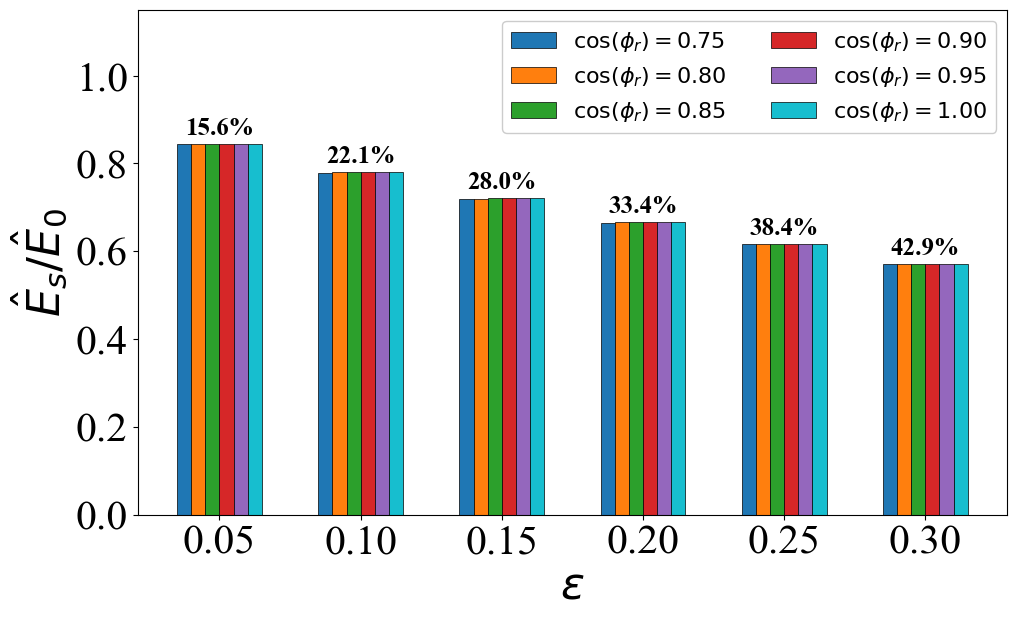

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
cos_phi_s = 0.4
tau_s = 0.05
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile
def r_hat(tau, eps):
    return 1 - eps * np.sin(nn * np.pi * tau)**2

# Storage arrays
energy_s_ratio = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_soft_starter = np.zeros_like(energy_s_ratio)

# Compute \hat{E}_s / \hat{E}_0 and savings
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))
        integral, _ = quad(f_r, tau_s, 1)
        E_s_by_E0 = (1 / cos_phi_r) * (
            tau_s * (cos_phi_s / 4 + (cos_phi_r - cos_phi_s) / 5)
            + (1 - tau_s) * integral
        )
        energy_s_ratio[i, j] = E_s_by_E0
        savings_soft_starter[i, j] = (1 - E_s_by_E0) * 100

# Plotting settings
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Create bar plot
plt.figure(figsize=(10, 6))
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    plt.bar(x + offset, energy_s_ratio[:, j], width=bar_width, color=color,
            label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Annotate average savings per epsilon group
average_savings = savings_soft_starter.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], energy_s_ratio[i].max() + 0.01, f"{avg:.1f}%",
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axis labels and formatting
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}_s / \\hat{E}_0$", fontsize=32)
plt.ylim(0, 1.15)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.tight_layout(pad=0.1)
plt.savefig('figure21.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure21.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure21.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

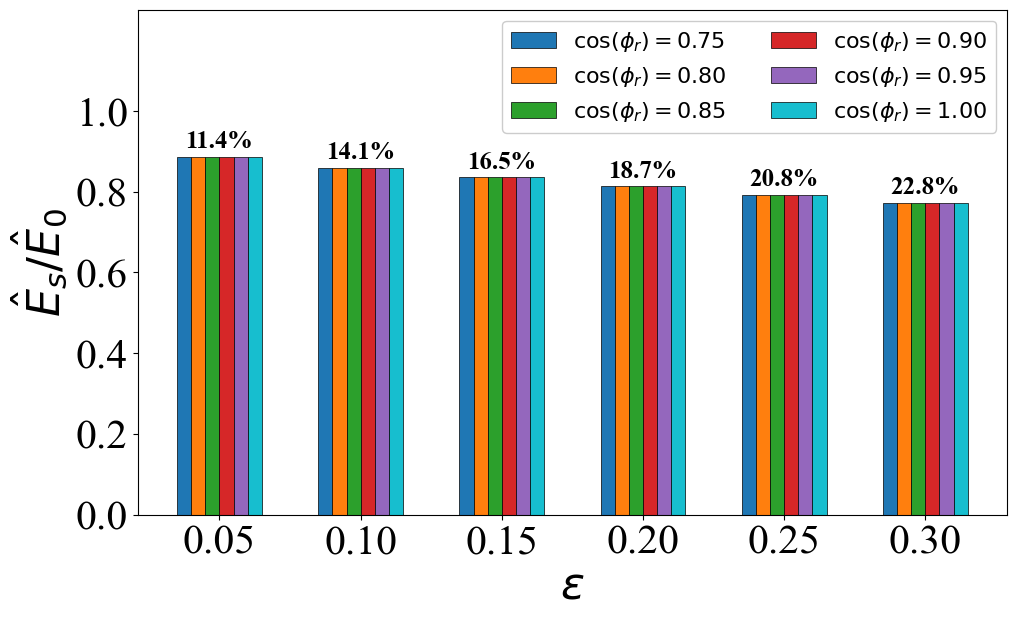

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
cos_phi_s = 0.4
tau_s = 0.05
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile using symmetric tanh dip
def r_hat(tau, eps, k=10):
    return 1 - eps * (1 - np.tanh(k * (tau - 0.5))**2)

# Storage arrays
energy_s_ratio = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_soft_starter = np.zeros_like(energy_s_ratio)

# Compute \hat{E}_s / \hat{E}_0 and savings
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))
        integral, _ = quad(f_r, tau_s, 1)
        E_s_by_E0 = (1 / cos_phi_r) * (
            tau_s * (cos_phi_s / 4 + (cos_phi_r - cos_phi_s) / 5)
            + (1 - tau_s) * integral
        )
        energy_s_ratio[i, j] = E_s_by_E0
        savings_soft_starter[i, j] = (1 - E_s_by_E0) * 100

# Plotting settings
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Create bar plot
plt.figure(figsize=(10, 6))
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    plt.bar(x + offset, energy_s_ratio[:, j], width=bar_width, color=color,
            label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Annotate average savings per epsilon group
average_savings = savings_soft_starter.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], energy_s_ratio[i].max() + 0.01, f"{avg:.1f}%",
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axis labels and formatting
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}_s / \\hat{E}_0$", fontsize=32)
plt.ylim(0, 1.25)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.tight_layout(pad=0.1)
plt.savefig('figure22.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure22.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure22.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

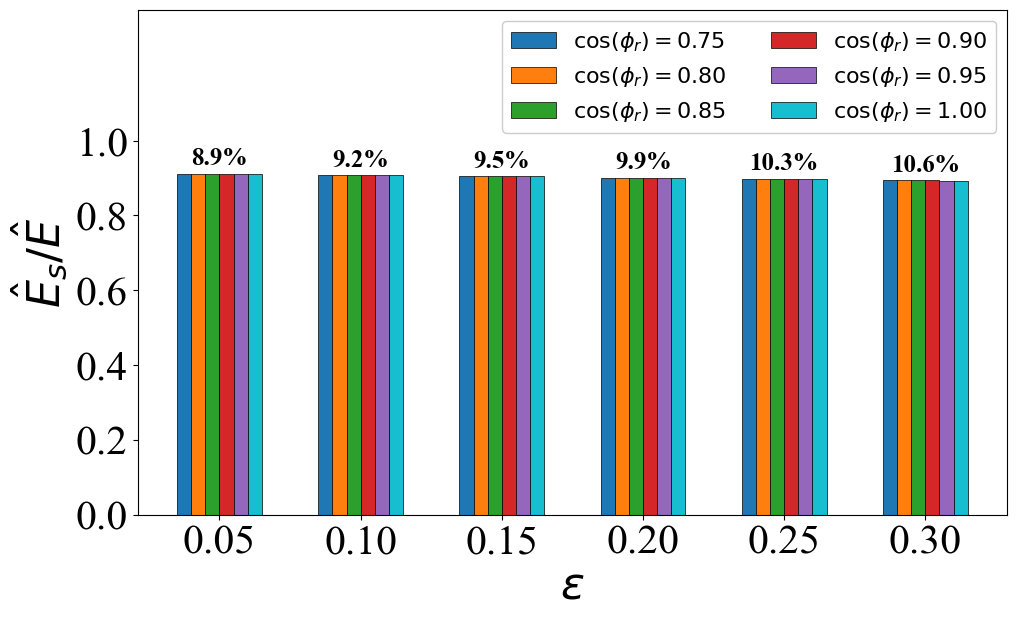

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
tau_s = 0.05
cos_phi_s = 0.4
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile
def r_hat(tau, eps):
    return 1 - eps * np.sin(nn * np.pi * tau)**2

# Storage
Es_by_E = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_matrix = np.zeros_like(Es_by_E)

# Main computation
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))

        # Integrals
        integral_tau_s_1, _ = quad(f_r, tau_s, 1)
        integral_0_1, _ = quad(f_r, 0, 1)

        # E_start / E
        E_start_by_E = (cos_phi_s / 4 + (cos_phi_r - cos_phi_s) / 5) / integral_0_1

        # E_s / E
        Es_over_E = tau_s * E_start_by_E + (1 - tau_s) * (integral_tau_s_1 / integral_0_1)
        Es_by_E[i, j] = Es_over_E
        savings_matrix[i, j] = (1 - Es_over_E) * 100

# Plot settings
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 6))

# Plot bars
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    plt.bar(x + offset, Es_by_E[:, j], width=bar_width, color=color,
            label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Annotate average savings per epsilon
average_savings = savings_matrix.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], Es_by_E[i].max() + 0.01, f"{avg:.1f}%",
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axes and layout
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}_s / \\hat{E}$", fontsize=32)
plt.ylim(0.0, 1.35)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.tight_layout(pad=0.1)
plt.savefig('figure23.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure23.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure23.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

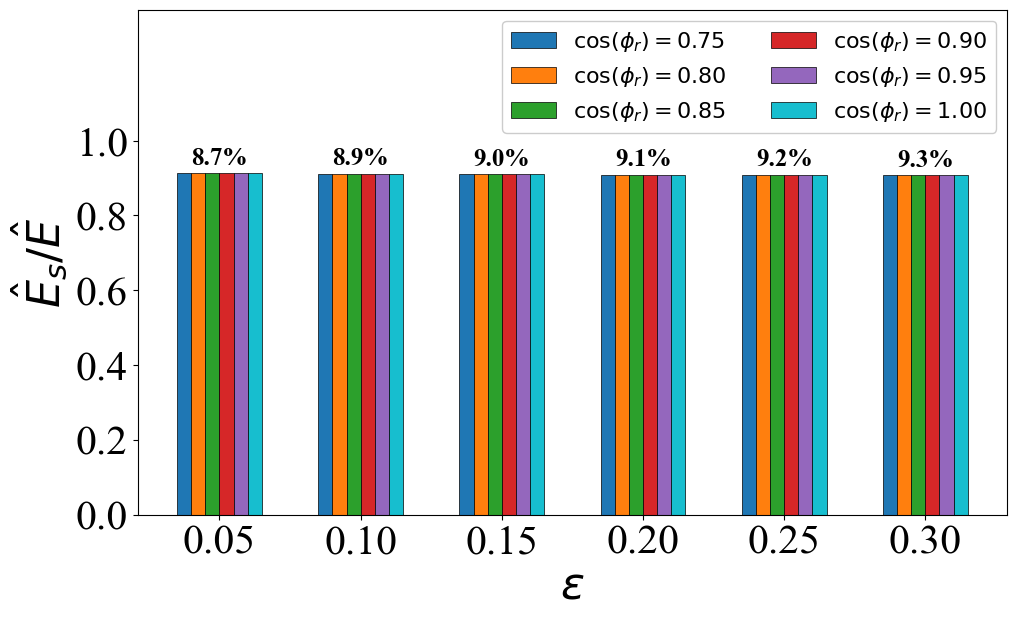

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
tau_s = 0.05
cos_phi_s = 0.4
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile using symmetric tanh dip
def r_hat(tau, eps, k=10):
    return 1 - eps * (1 - np.tanh(k * (tau - 0.5))**2)

# Storage
Es_by_E = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_matrix = np.zeros_like(Es_by_E)

# Main computation
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))

        # Integrals
        integral_tau_s_1, _ = quad(f_r, tau_s, 1)
        integral_0_1, _ = quad(f_r, 0, 1)

        # E_start / E
        E_start_by_E = (cos_phi_s / 4 + (cos_phi_r - cos_phi_s) / 5) / integral_0_1

        # E_s / E
        Es_over_E = tau_s * E_start_by_E + (1 - tau_s) * (integral_tau_s_1 / integral_0_1)
        Es_by_E[i, j] = Es_over_E
        savings_matrix[i, j] = (1 - Es_over_E) * 100

# Plot settings
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 6))

# Plot bars
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    plt.bar(x + offset, Es_by_E[:, j], width=bar_width, color=color,
            label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Annotate average savings per epsilon
average_savings = savings_matrix.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], Es_by_E[i].max() + 0.01, f"{avg:.1f}%",
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axes and layout
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}_s / \\hat{E}$", fontsize=32)
plt.ylim(0.0, 1.35)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.tight_layout(pad=0.1)
plt.savefig('figure24.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure24.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure24.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()